In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor


In [2]:
data = pd.read_csv(r"kaggle_ride_data.csv")

In [3]:
data.shape

(693071, 57)

In [4]:
dup = data.duplicated() 
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


In [5]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [6]:
data['name'].value_counts()

UberXL          55096
WAV             55096
Black SUV       55096
Taxi            55095
Black           55095
UberX           55094
UberPool        55091
Lyft            51235
Lyft XL         51235
Lux Black       51235
Lux Black XL    51235
Lux             51235
Shared          51233
Name: name, dtype: int64

In [7]:
new_data = data[data['name'].isin(['Shared', 'Lux', 'Lyft', 'Taxi', 'UberX', 'UberPool', 'Black']) ]

In [8]:
new_data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
8,4f9fee41-fde3-4767-bbf1-a00e108701fb,1.543818e+09,6,3,12,2018-12-03 06:28:02,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
10,9043bf77-1d45-4a93-9520-a083e0277f16,1.543594e+09,16,30,11,2018-11-30 16:13:03,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600


In [9]:
new_data.shape

(374078, 57)

In [11]:
new_data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,3.740780e+05,374078.000000,374078.000000,374078.000000,318983.000000,374078.000000,374078.000000,374078.000000,374078.000000,374078.000000,...,374078.000000,3.740780e+05,374078.000000,3.740780e+05,374078.000000,3.740780e+05,374078.000000,3.740780e+05,374078.000000,3.740780e+05
mean,1.544046e+09,11.617951,17.785141,11.587078,12.109710,2.189580,1.010303,42.338153,-71.066168,39.583830,...,0.037377,1.544044e+09,33.455304,1.544042e+09,45.261033,1.544048e+09,29.730446,1.544048e+09,41.996871,1.544048e+09
std,6.890753e+05,6.949356,9.984845,0.492360,6.285188,1.141937,0.079507,0.047835,0.020313,6.724133,...,0.055205,6.910613e+05,6.467857,6.900789e+05,5.643429,6.899825e+05,7.110746,6.870652e+05,6.935975,6.909217e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,7.500000,1.280000,1.000000,42.350300,-71.081000,36.500000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543738e+09,12.000000,17.000000,12.000000,10.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544827e+09,18.000000,28.000000,12.000000,16.000000,2.910000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,68.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [12]:
new_data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [13]:
new_data['price'].median()

10.5

In [14]:
 pd.options.mode.chained_assignment = None
new_data['price'].fillna(10.5, inplace = True)
new_data.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

<AxesSubplot:>

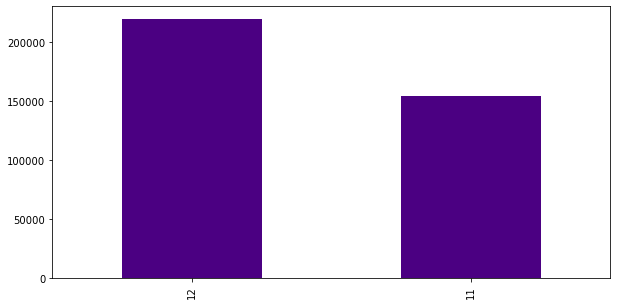

In [18]:
new_data['month'].value_counts().plot(kind='bar', figsize=(10,5), color='indigo')

<AxesSubplot:>

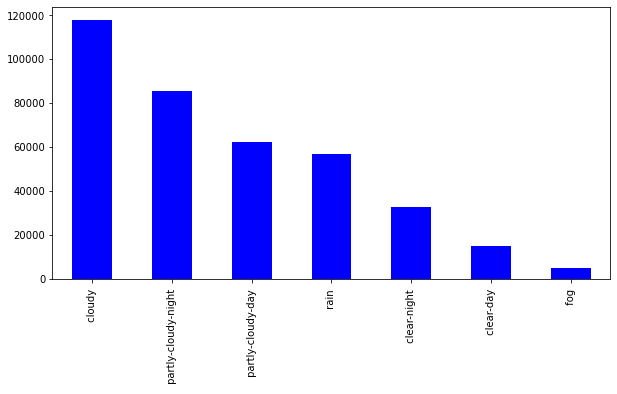

In [17]:
new_data['icon'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')

In [20]:
label_encoder = preprocessing.LabelEncoder() 
new_data.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [21]:
 pd.options.mode.chained_assignment = None
new_data['id']= label_encoder.fit_transform(new_data['id']) 
new_data['datetime']= label_encoder.fit_transform(new_data['datetime']) 
new_data['timezone']= label_encoder.fit_transform(new_data['timezone'])
new_data['destination']= label_encoder.fit_transform(new_data['destination']) 
new_data['product_id']= label_encoder.fit_transform(new_data['product_id'])
new_data['short_summary']= label_encoder.fit_transform(new_data['short_summary'])
new_data['long_summary']= label_encoder.fit_transform(new_data['long_summary'])

In [22]:
new_data['name']= label_encoder.fit_transform(new_data['name'])
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Black --> 0
Lux --> 1
Lyft --> 2
Shared --> 3
Taxi --> 4
UberPool --> 5
UberX --> 6


In [23]:
new_data['source']= label_encoder.fit_transform(new_data['source'])
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [24]:
new_data['icon']= label_encoder.fit_transform(new_data['icon'])
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [25]:
new_data['price'] = new_data['price'].astype(int)
X = new_data.drop('price', axis = 1)
y = new_data['price']

In [26]:
X = X.drop('cab_type', axis=1)

In [27]:
label_encoder = preprocessing.LabelEncoder() 
X.dtypes

id                               int32
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                         int32
timezone                         int32
source                           int32
destination                      int32
product_id                       int32
name                             int32
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                    int32
long_summary                     int32
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                       float64
windGustTime                     int64
visibility               

In [28]:
X.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,product_id,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,96827,1.544953e+09,9,16,12,25346,0,5,7,5,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,110852,1.543284e+09,2,27,11,961,0,5,7,6,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,222014,1.543367e+09,1,28,11,2534,0,5,7,4,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
8,116299,1.543818e+09,6,3,12,14511,0,0,8,5,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
10,210447,1.543594e+09,16,30,11,8158,0,0,8,6,...,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600


In [29]:
y.head()

0      5
1     11
2      7
8      3
10    13
Name: price, dtype: int32

In [30]:
X.shape

(374078, 55)

In [31]:
y.shape

(374078,)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
X_train.shape

(299262, 55)

In [34]:
X_test.shape

(74816, 55)

In [35]:
y_train.shape

(299262,)

In [36]:
y_test.shape

(74816,)

In [37]:
xgbr=XGBRegressor()
xgbr.fit(X_train, y_train)
xgbr.score(X_test, y_test)
#k=55 0.9468444817550471

0.9468444817550471

In [38]:
#using rfe for feature selection
#k=25 0.9468021057342644
#k=40 0.9464620950784768
#k=30 0.946662237335533
#k=15 0.9468355822279267
#k=10 0.9470181364158027
rfe = RFE(xgbr, 10, verbose=1)
rfe = rfe.fit(X, y)

C:\Users\Darkwolf\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 fe

In [39]:
rfe.support_

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [40]:
XX = X[X.columns[rfe.support_]]
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [41]:
xgbr=XGBRegressor()
xgbr.fit(X_train, y_train)
xgbr.score(X_test, y_test)

0.9470181364158027

In [42]:
XX.columns

Index(['source', 'destination', 'product_id', 'name', 'distance',
       'surge_multiplier', 'windGust', 'visibility',
       'apparentTemperatureHighTime', 'apparentTemperatureLow'],
      dtype='object')

In [43]:
#removing further waste features
features_drop = ['windGust','visibility','apparentTemperatureHighTime','apparentTemperatureLow']
new_data = XX.drop(features_drop, axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size = 0.2, random_state = 42)
xgbr=XGBRegressor()
xgbr.fit(X_train, y_train)
xgbr.score(X_test, y_test)

0.9484448915728785

In [45]:
new_data.head()

,source,destination,product_id,name,distance,surge_multiplier
0,5,7,5,3,0.44,1.0
1,5,7,6,1,0.44,1.0
2,5,7,4,2,0.44,1.0
8,0,8,5,3,1.08,1.0
10,0,8,6,1,1.08,1.0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size = 0.3, random_state = 10)

In [90]:
#0.9482508867426854
#eta=0.6,max_depth=8,min_child_weight=1.5 0.9492495232473771
xgbr=XGBRegressor(eta=0.6,max_depth=8,min_child_weight=1.5,colsample_bytree=0.9)
xgbr.fit(X_train, y_train)
xgbr.score(X_test, y_test)

0.9491903926771627

In [48]:
#linear = LinearRegression()
#linear.fit(X_train, y_train)
#linear.score(X_test, y_test)
#0.6662976321197515

In [49]:
#decision = DecisionTreeRegressor(random_state = 0)  
#decision.fit(X_train, y_train) 
#decision.score(X_test, y_test)
#0.9468883043112083

In [50]:
#random = RandomForestRegressor(n_estimators = 100, random_state = 0) 
#random.fit(X_train, y_train)  
#random.score(X_test, y_test)
#0.9481346720904356

In [86]:
#from sklearn import ensemble
#clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5)
#clf.fit(X_train, y_train)
#clf.score(X_test, y_test)
#0.9475575610252001

0.9475575610252001

In [52]:
new_data.head()

,source,destination,product_id,name,distance,surge_multiplier
0,5,7,5,3,0.44,1.0
1,5,7,6,1,0.44,1.0
2,5,7,4,2,0.44,1.0
8,0,8,5,3,1.08,1.0
10,0,8,6,1,1.08,1.0


In [53]:
y.head()

0      5
1     11
2      7
8      3
10    13
Name: price, dtype: int32

In [54]:
predrating=xgbr.predict(X_test)

In [55]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error( y_test,predrating))
print('MSE :'," ", metrics.mean_squared_error( y_test,predrating))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error( y_test,predrating)))

MAE :   0.8004482814116393
MSE :   1.685156277068019
RMAE :   1.2981356928564975


C:\Users\Darkwolf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

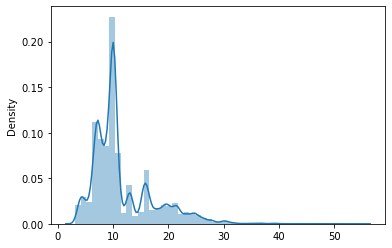

In [94]:
sns.distplot(predrating,bins=50)

In [57]:
print("these are the different vaules for source input ",pd.unique(new_data['source']))
print("these are the different vaules for destination input ",pd.unique(new_data['destination']))
print("these are the different vaules for product_id input ",pd.unique(new_data['product_id']))
print("these are the different vaules for name input ",pd.unique(new_data['name']))
print("these are the different vaules for distance input ",pd.unique(new_data['distance']))
print("these are the different vaules for surge_multiplier input ",pd.unique(new_data['surge_multiplier']))



these are the different vaues for source input  [ 5  0  6  7  1  2  3  9 10 11  4  8]
these are the different vaues for destination input  [ 7  8 11  5  9  3 10  1  0  6  4  2]
these are the different vaues for product_id input  [5 6 4 1 0 3 2]
these are the different vaues for name input  [3 1 2 0 6 5 4]
these are the different vaues for distance input  [0.44 1.08 1.11 0.72 2.48 3.24 2.94 1.76 0.71 1.23 1.16 2.67 3.39 2.82
 2.49 3.07 1.57 3.2  3.61 3.05 1.75 2.36 2.32 1.02 1.17 4.43 1.4  1.01
 2.84 1.3  1.81 2.44 3.04 2.59 3.25 2.66 3.26 2.39 2.81 3.18 2.63 3.14
 1.79 2.16 1.39 1.97 2.92 2.14 0.91 2.58 3.23 3.02 0.64 2.38 0.8  2.07
 2.61 3.45 1.35 2.8  1.03 3.35 2.93 1.07 3.17 1.2  7.46 1.58 1.71 1.21
 1.61 3.3  4.39 0.55 4.42 1.45 0.61 0.49 0.39 3.8  2.46 2.34 2.56 4.23
 1.56 2.35 3.37 1.52 2.05 2.15 1.26 1.5  4.76 1.34 3.41 1.33 2.19 1.04
 1.22 1.09 0.54 2.09 3.68 1.66 1.92 2.33 2.25 2.88 3.42 1.41 4.51 0.56
 3.47 4.09 2.73 3.19 0.65 2.78 1.   2.62 2.77 2.47 1.43 3.1  1.89 2.3
 4.31

In [58]:
#use the above value to enter input
a = input("Enter your value for source input")
b = input("Enter your value for destination input ")
c = input("Enter your value for product_id input ")
d = input("Enter your value for name input ")
e = input("Enter your value for distance input ")
f = input("Enter your value for surge_multiplier input ")

Enter your value: 0
Enter your value: 8
Enter your value: 6
Enter your value: 1
Enter your value: 1.08
Enter your value: 1


In [59]:
#here attributes are loaded in pd format
dict = {'source':[a],
        'destination':[b],
        'product_id':[c],
        'name':[d],
        'distance':[e],
        'surge_multiplier':[f]
       }
  
df = pd.DataFrame(dict)

In [60]:
#the price is predicted here
print("the predicted price is ",xgbr.predict(df).astype(int))

the predicted price is  [11]
